# Review: *ydata-quality*

To dive into any focussed module, and to understand how they work, here are tutorial notebooks:
1. Bias and Fairness
2. Data Expectations
3. Data Relations
4. Drift Analysis
5. Duplicates
6. Labelling: Categoricals and Numericals
7. Missings
8. Erroneous Data

https://pypi.org/project/ydata-quality/

In [2]:
from ydata_quality import DataQuality
from sklearn.datasets import fetch_california_housing

# dataset

In [3]:
dd = fetch_california_housing(as_frame=True)
df = dd["frame"]
df.shape, df.columns

((20640, 9),
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude', 'MedHouseVal'],
       dtype='object'))

In [12]:
# dataset splitting
i_train = df.head(15000).index.tolist()
i_test = [i for i in df.index if not i in i_train]
train = df[df.index.isin(i_train)]
test = df[df.index.isin(i_test)]
train.shape, test.shape

((15000, 9), (5640, 9))

# general report

In [4]:
# create a DataQuality object from the main class that holds all quality modules
dq = DataQuality(df=df)
# run the tests and outputs a summary of the quality tests
results = dq.evaluate()

Warnings:
	TOTAL: 1 warning(s)
	Priority 2: 1 warning(s)


Priority 2 - usage allowed, limited human intelligibility:
	* [DATA RELATIONS - HIGH COLLINEARITY - NUMERICAL] Found 4 numerical variables with high Variance Inflation Factor (VIF>5.0). The variables listed in results are highly collinear with other variables in the dataset. These will make model explainability harder and potentially give way to issues like overfitting.Depending on your end goal you might want to remove the highest VIF variables.



In [6]:
# retrieve a list of data quality warnings 
warnings = dq.get_warnings()
len(warnings), warnings

(1,
 [QualityWarning(category='Data Relations', test='High Collinearity - Numerical', description='Found 4 numerical variables with high Variance Inflation Factor (VIF>5.0). The variables listed in results are highly collinear with other variables in the dataset. These will make model explainability harder and potentially give way to issues like overfitting.Depending on your end goal you might want to remove the highest VIF variables.', priority=<Priority.P2: 2>, data=Latitude     10.842087
  Longitude    10.407641
  AveRooms      8.477254
  AveBedrms     7.173226
  dtype: float64)])

# bias

In [34]:
from ydata_quality.bias_fairness import BiasFairness

In [36]:
bf = BiasFairness(df=df, sensitive_features=['HouseAge'], label='MedHouseVal', random_state=42)
results = bf.evaluate()

WARNING | Skipping performance_discrimination due to failure during computation.                         See results folder of this test for further details.
WARNING | Skipping sensitive_predictability due to failure during computation.                         See results folder of this test for further details.
No warnings found.


# data expectations

expectations.json
```
{"meta": {"great_expectations_version": "0.13.26", "expectation_suite_name": "taxi.sopas", "run_id": {"run_time": "2021-08-12T19:14:16.211079+00:00", "run_name": "20210812-191416-my-run-name-template"}, "batch_spec": {"path": "/home/fsantos/GitRepos/ge_tutorials/great_expectations/../data/yellow_tripdata_sample_2019-02.csv"}, "batch_markers": {"ge_load_time": "20210812T181416.548033Z", "pandas_data_fingerprint": "88b447d903f05fb594b87b13de399e45"}, "active_batch_definition": {"datasource_name": "data__dir", "data_connector_name": "default_inferred_data_connector_name", "data_asset_name": "yellow_tripdata_sample_2019-02.csv", "batch_identifiers": {}}, "validation_time": "20210812T181416.573359Z"}, "success": false, "results": [{"meta": {}, "success": true, "result": {"observed_value": ["vendor_id", "pickup_datetime", "dropoff_datetime", "passenger_count", "trip_distance", "rate_code_id", "store_and_fwd_flag", "pickup_location_id", "dropoff_location_id", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge"]}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_table_columns_to_match_ordered_list", "kwargs": {"column_list": ["vendor_id", "pickup_datetime", "dropoff_datetime", "passenger_count", "trip_distance", "rate_code_id", "store_and_fwd_flag", "pickup_location_id", "dropoff_location_id", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge"]}}}, {"meta": {}, "success": true, "result": {"observed_value": 10000}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_table_row_count_to_be_between", "kwargs": {"max_value": 10000, "min_value": 10000}}}, {"meta": {}, "success": false, "result": {"observed_value": 0}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_min_to_be_between", "kwargs": {"column": "passenger_count", "max_value": 1, "min_value": 1}}}, {"meta": {}, "success": true, "result": {"observed_value": 6}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_max_to_be_between", "kwargs": {"column": "passenger_count", "max_value": 6, "min_value": 6}}}, {"meta": {}, "success": false, "result": {"observed_value": 1.3577}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_mean_to_be_between", "kwargs": {"column": "passenger_count", "max_value": 1.5716, "min_value": 1.5716}}}, {"meta": {}, "success": true, "result": {"observed_value": 1.0}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_median_to_be_between", "kwargs": {"column": "passenger_count", "max_value": 1.0, "min_value": 1.0}}}, {"meta": {}, "success": false, "result": {"observed_value": {"quantiles": [0.05, 0.25, 0.5, 0.75, 0.95], "values": [0, 1, 1, 1, 5]}, "details": {"success_details": [false, true, true, false, true]}}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_quantile_values_to_be_between", "kwargs": {"allow_relative_error": "lower", "column": "passenger_count", "quantile_ranges": {"quantiles": [0.05, 0.25, 0.5, 0.75, 0.95], "value_ranges": [[1, 1], [1, 1], [1, 1], [2, 2], [5, 5]]}}}}, {"meta": {}, "success": false, "result": {"element_count": 10000, "unexpected_count": 1579, "unexpected_percent": 15.790000000000001, "partial_unexpected_list": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "missing_count": 0, "missing_percent": 0.0, "unexpected_percent_total": 15.790000000000001, "unexpected_percent_nonmissing": 15.790000000000001, "partial_unexpected_index_list": null, "partial_unexpected_counts": [{"value": 0, "count": 20}]}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_values_to_be_in_set", "kwargs": {"column": "passenger_count", "value_set": [1, 2, 3, 4, 5, 6]}}}, {"meta": {}, "success": true, "result": {"element_count": 10000, "unexpected_count": 0, "unexpected_percent": 0.0, "partial_unexpected_list": [], "partial_unexpected_index_list": null, "partial_unexpected_counts": []}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_values_to_not_be_null", "kwargs": {"column": "passenger_count"}}}, {"meta": {}, "success": false, "result": {"observed_value": 0.0007}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_proportion_of_unique_values_to_be_between", "kwargs": {"column": "passenger_count", "max_value": 0.0006, "min_value": 0.0006}}}, {"meta": {}, "success": true, "result": {"observed_value": "int64"}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_values_to_be_in_type_list", "kwargs": {"column": "passenger_count", "type_list": ["INTEGER", "integer", "int", "int_", "int8", "int16", "int32", "int64", "uint8", "uint16", "uint32", "uint64", "INT", "INTEGER", "INT64", "TINYINT", "BYTEINT", "SMALLINT", "BIGINT", "IntegerType", "LongType"]}}}, {"meta": {}, "success": true, "result": {"observed_value": 0.0}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_min_to_be_between", "kwargs": {"column": "trip_distance", "max_value": 0.0, "min_value": 0.0}}}, {"meta": {}, "success": false, "result": {"observed_value": 37.52}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_max_to_be_between", "kwargs": {"column": "trip_distance", "max_value": 57.95, "min_value": 57.95}}}, {"meta": {}, "success": false, "result": {"observed_value": 2.849045}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_mean_to_be_between", "kwargs": {"column": "trip_distance", "max_value": 2.7589909999999995, "min_value": 2.7589909999999995}}}, {"meta": {}, "success": false, "result": {"observed_value": 1.6}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_median_to_be_between", "kwargs": {"column": "trip_distance", "max_value": 1.53, "min_value": 1.53}}}, {"meta": {}, "success": false, "result": {"observed_value": {"quantiles": [0.05, 0.25, 0.5, 0.75, 0.95], "values": [0.48, 0.95, 1.6, 2.85, 10.7]}, "details": {"success_details": [false, false, false, false, false]}}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_quantile_values_to_be_between", "kwargs": {"allow_relative_error": "lower", "column": "trip_distance", "quantile_ranges": {"quantiles": [0.05, 0.25, 0.5, 0.75, 0.95], "value_ranges": [[0.45, 0.45], [0.9, 0.9], [1.53, 1.53], [2.79, 2.79], [10.31, 10.31]]}}}}, {"meta": {}, "success": true, "result": {"element_count": 10000, "unexpected_count": 0, "unexpected_percent": 0.0, "partial_unexpected_list": [], "partial_unexpected_index_list": null, "partial_unexpected_counts": []}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_values_to_not_be_null", "kwargs": {"column": "trip_distance"}}}, {"meta": {}, "success": false, "result": {"observed_value": 0.12}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_proportion_of_unique_values_to_be_between", "kwargs": {"column": "trip_distance", "max_value": 0.1184, "min_value": 0.1184}}}, {"meta": {}, "success": true, "result": {"observed_value": "float64"}, "exception_info": {"raised_exception": false, "exception_traceback": null, "exception_message": null}, "expectation_config": {"meta": {}, "expectation_type": "expect_column_values_to_be_in_type_list", "kwargs": {"column": "trip_distance", "type_list": ["FLOAT", "FLOAT4", "FLOAT8", "FLOAT64", "DOUBLE", "DOUBLE_PRECISION", "NUMERIC", "FloatType", "DoubleType", "float_", "float16", "float32", "float64", "number", "DECIMAL", "REAL"]}}}], "evaluation_parameters": {}, "statistics": {"evaluated_expectations": 19, "successful_expectations": null, "unsuccessful_expectations": null, "success_percent": 47.368421052631575}}
```

# data relations 

https://github.com/ydataai/ydata-quality/blob/master/tutorials/data_relations.ipynb

In [31]:
from ydata_quality.data_relations import DataRelationsDetector

WARNING | Property 'dtypes' should be a dictionary. Defaulting to all column dtypes inference.


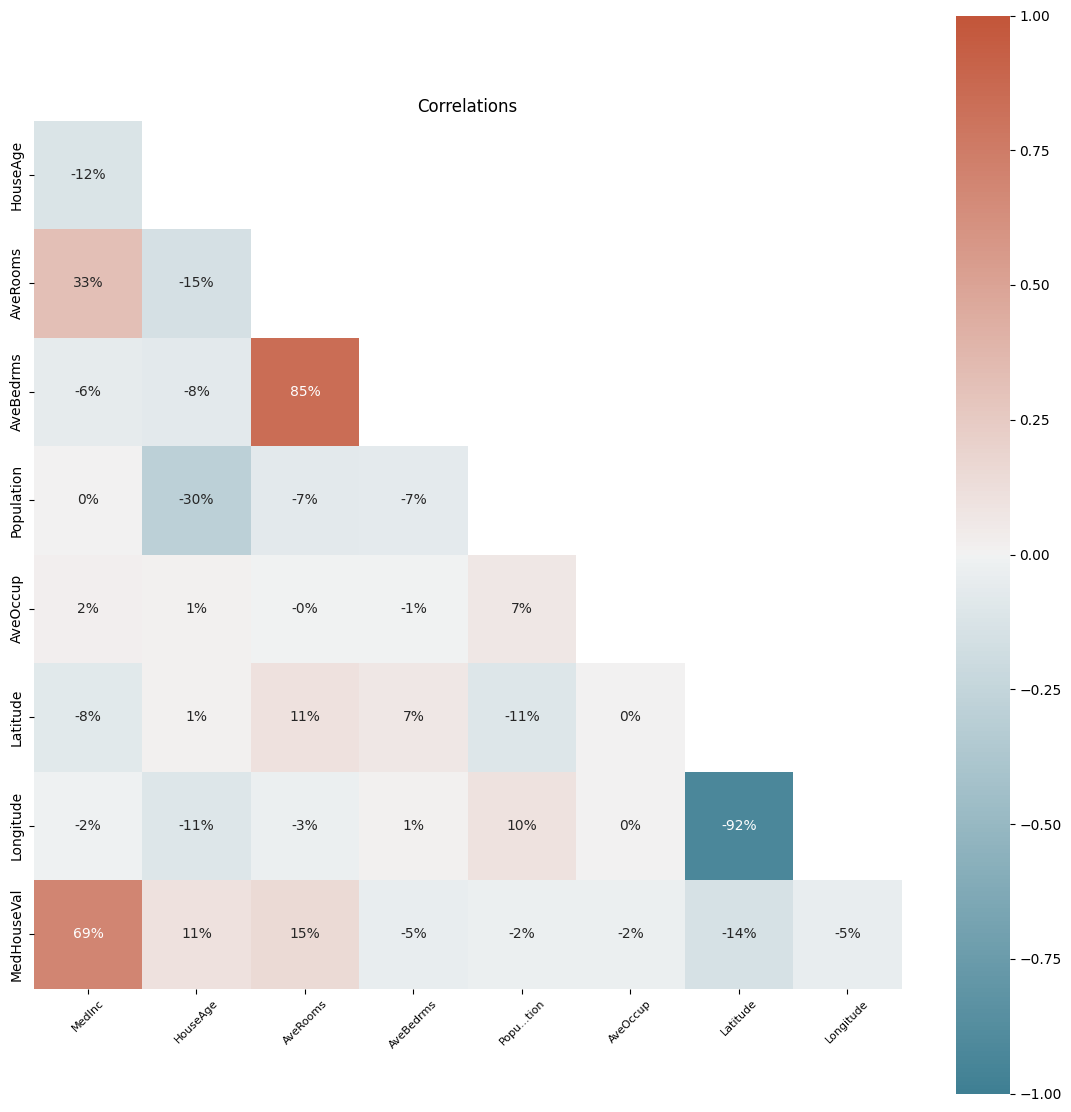

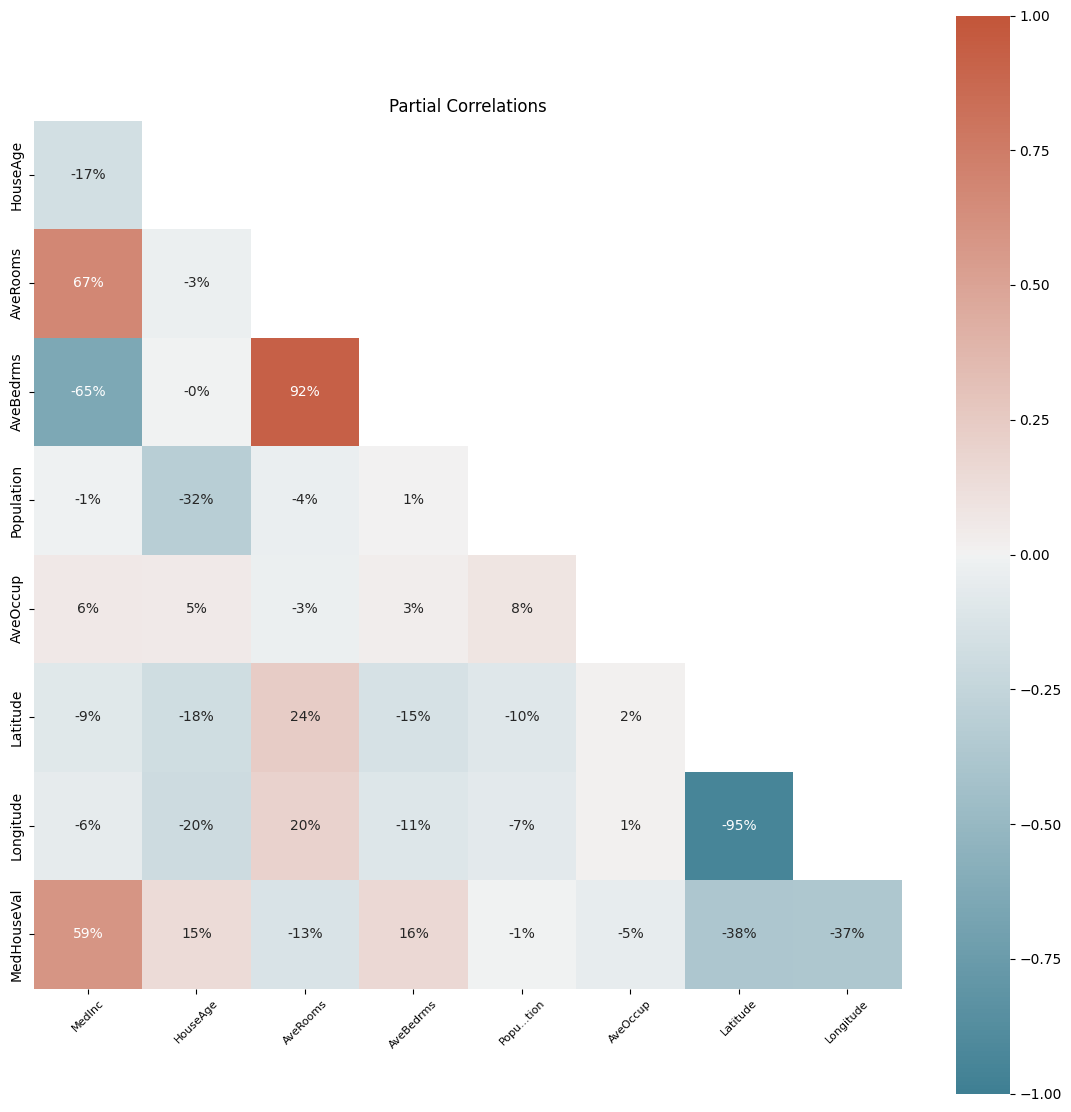

Warnings:
	TOTAL: 1 warning(s)
	Priority 2: 1 warning(s)


Priority 2 - usage allowed, limited human intelligibility:
	* [DATA RELATIONS - HIGH COLLINEARITY - NUMERICAL] Found 4 numerical variables with high Variance Inflation Factor (VIF>5.0). The variables listed in results are highly collinear with other variables in the dataset. These will make model explainability harder and potentially give way to issues like overfitting.Depending on your end goal you might want to remove the highest VIF variables.



In [32]:
drd = DataRelationsDetector()
results = drd.evaluate(df)

In [33]:
warnings = drd.get_warnings()
len(warnings), warnings

(1,
 [QualityWarning(category='Data Relations', test='High Collinearity - Numerical', description='Found 4 numerical variables with high Variance Inflation Factor (VIF>5.0). The variables listed in results are highly collinear with other variables in the dataset. These will make model explainability harder and potentially give way to issues like overfitting.Depending on your end goal you might want to remove the highest VIF variables.', priority=<Priority.P2: 2>, data=Latitude     10.842087
  Longitude    10.407641
  AveRooms      8.477254
  AveBedrms     7.173226
  dtype: float64)])

# drift analysis

https://github.com/ydataai/ydata-quality/blob/master/tutorials/drift.ipynb

In [14]:
from ydata_quality.drift import DriftAnalyser
da = DriftAnalyser(ref=train, sample=test,  random_state=42)

In [16]:
results = da.evaluate()

WARNING | No label was provided. Test skipped.
Warnings:
	TOTAL: 1 warning(s)
	Priority 2: 1 warning(s)


Priority 2 - usage allowed, limited human intelligibility:
	* [SAMPLING - SAMPLE COVARIATE DRIFT] 8 features accused drift in the sample test. The covariates of the test sample do not appear to be representative of the reference sample.



In [18]:
warnings = da.get_warnings()
len(warnings), warnings

(1,
 [QualityWarning(category='Sampling', test='Sample covariate drift', description='8 features accused drift in the sample test. The covariates of the test sample do not appear to be representative of the reference sample.', priority=<Priority.P2: 2>, data=                      Statistic Statistic Value   p-value Verdict
  MedInc       Kolmogorov-Smirnov        0.080051       0.0   Drift
  HouseAge     Kolmogorov-Smirnov        0.105715       0.0   Drift
  AveRooms     Kolmogorov-Smirnov         0.09163       0.0   Drift
  AveBedrms    Kolmogorov-Smirnov        0.033648  0.000182   Drift
  Population   Kolmogorov-Smirnov        0.020026  0.073686      OK
  AveOccup     Kolmogorov-Smirnov        0.077715       0.0   Drift
  Latitude     Kolmogorov-Smirnov        0.490648       0.0   Drift
  Longitude    Kolmogorov-Smirnov        0.560248       0.0   Drift
  MedHouseVal  Kolmogorov-Smirnov        0.163591       0.0   Drift)])

In [19]:
# As expected the corrupted alcohol feature is detected after the corruption step, a small boost of 0.8 vol(%) triggered this alarm
sample_cov_drift_out = da.sample_covariate_drift()
sample_cov_drift_out.head()

,Statistic,Statistic Value,p-value,Verdict
MedInc,Kolmogorov-Smirnov,0.080051,0.0,Drift
HouseAge,Kolmogorov-Smirnov,0.105715,0.0,Drift
AveRooms,Kolmogorov-Smirnov,0.09163,0.0,Drift
AveBedrms,Kolmogorov-Smirnov,0.033648,0.000182,Drift
Population,Kolmogorov-Smirnov,0.020026,0.073686,OK


# duplicates

https://github.com/ydataai/ydata-quality/blob/master/tutorials/duplicates.ipynb

In [21]:
from ydata_quality.duplicates import DuplicateChecker

In [22]:
dc = DuplicateChecker(df=df)
results = dc.evaluate()
results.keys()

INFO | No exact duplicates were found.
WARNING | There are no entities defined to run the analysis. Skipping the test.
INFO | No duplicate columns were found.
No warnings found.


dict_keys(['exact_duplicates', 'entity_duplicates', 'duplicate_columns'])

In [23]:
dc.duplicate_columns()

INFO | No duplicate columns were found.


# missing

https://github.com/ydataai/ydata-quality/blob/master/tutorials/missings.ipynb

In [24]:
from ydata_quality.missings import MissingsProfiler

In [25]:
mp = MissingsProfiler(df=df, random_state=42)
results = mp.evaluate()

No warnings found.


In [26]:
mp.missing_correlations()

""


In [27]:
mp.high_missing_correlations(th=0.8)

Series([], Name: missings_corr, dtype: float64)